In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from env.balloon import Balloon, WindVector

You can change time step / initial position / amount of initial resources as you want! 

In [2]:
'''
Adjust num_steps to change the simulation duration.
Set the initial latitude and longitude to anywhere you like!
Change the initial resources. What happens if the balloon is larger? What if you have more sand? Can you find an initial setting that keeps the balloon at a steady altitude?
'''
# Simulation parameters
dt = 120  # Time step in seconds
num_steps = 200  # Number of time steps to simulate (simulation time = dt * num_steps)

# Ithaca, NY
initial_lat = 42.6  # Initial latitude (degrees)
initial_lon = -76.50  # Initial longitude (degrees)
initial_alt = 10  # Initial altitude (km)
# Initial resources
# Balloon will drop if resources are not used.
initial_volume = 1000.0  # Initial volume (m³)
initial_sand = 100  # Initial sand mass (kg)
# Balloon will go up, burst and drop if resources are not used.
# initial_volume = 1000.0  # Initial volume (m³)
# initial_sand = 90.0  # Initial sand mass (kg)
print("Simulation Parameters:")
print(f"Time step (dt): {dt} seconds")
print(f"Initial position: ({initial_lat}°, {initial_lon}°)")
print(f"Initial altitude: {initial_alt} km")
print(f"Initial volume: {initial_volume} m³")
print(f"Initial sand: {initial_sand} kg")

# Create balloon instance
balloon = Balloon(
    initial_lat=initial_lat,
    initial_lon=initial_lon,
    initial_alt=initial_alt,
    initial_volume=initial_volume,
    initial_sand=initial_sand
)
initial_helium = balloon.helium_mass

print("\nBalloon created successfully!")
print(f"Initial helium mass: {balloon.helium_mass:.2f} kg")
print(f"Max volume (burst limit): {balloon.max_volume} m³")

Simulation Parameters:
Time step (dt): 120 seconds
Initial position: (42.6°, -76.5°)
Initial altitude: 10 km
Initial volume: 1000.0 m³
Initial sand: 100 kg

Balloon created successfully!
Initial helium mass: 178.60 kg
Max volume (burst limit): 2500.0 m³


You can change 

In [3]:
'''
Generate wind vector
wind[0]: + → eastward - → westward
wind[1]: + → northward - → southward
'''
## No wind
# wind = WindVector(0.0, 0.0) # m/s
## Wind toward east
# wind = WindVector(10.0, 0.0) # m/s
## Wind toward north
# wind = WindVector(0.0, 10.0) # m/s
# Wind toward east and north
wind = WindVector(10.0, 5.0) # m/s


In [4]:
"""
Design a resource consumption function.
"""
## Constant resource consumption
## case 1: No helium venting, No sand dropping
# constant_dHelium = 0.0  
# constant_dSand = 0.0   
## case 2: vent gas -> balloon volume decrease -> buoyancy decrease -> going down
# constant_dHelium = initial_helium * 0.01 
# constant_dSand = 0.0    
## case 3: drop sand -> weight decrease -> going up
constant_dHelium = 0.0  
constant_dSand = initial_sand * 0.01   
def dHelium_function(step):
    return constant_dHelium
def dSand_function(step):
    return constant_dSand


## linear resource consumption
# def dHelium_function(step):
#     return step 
# def dSand_function(step):
#     return step * 10


## drop sand for first half of the simulation and vent helium for second half
# def dHelium_function(step):
#     return max(0, -0.1*np.sin(step / num_steps * 2 * np.pi)) 
# def dSand_function(step):
#     return max(0, +0.1*np.sin(step / num_steps * 2 * np.pi)) 



In [5]:
# Arrays to store trajectory data
times = np.arange(0, num_steps * dt, dt)
altitudes = []
latitudes = []
longitudes = []
volumes = []
helium_masses = []
sand_masses = []
forces = []
print(f"Running simulation for {num_steps} steps with dt={dt}s...")
print(f"Total simulation time: {num_steps * dt} seconds ({num_steps * dt / 3600:.2f} hours)")

# Store initial state
altitudes.append(balloon.alt)
latitudes.append(balloon.lat)
longitudes.append(balloon.lon)
volumes.append(balloon.volume)
helium_masses.append(balloon.helium_mass)
sand_masses.append(balloon.sand)
forces.append(balloon.forces)
burst_flag = False
depletion_flag = False
# Run simulation
for step in range(num_steps):
    # Run one step
    if burst_flag == False and depletion_flag == False:
        dHelium = dHelium_function(step)
        dSand = dSand_function(step)
    result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    
    # Check if simulation ended due to resource depletion
    if result is not None:  # Resource depletion message
        if result == f"Balloon Crashed":
            print(f"\nSimulation stopped at step {step + 1}: {result}")
            break
        elif result == f"Balloon burst : {balloon.volume}":
            if burst_flag == False:
                print(f"\nAt step {step + 1}: {result}")
                burst_flag = True
                dHelium = initial_helium * 0.1 # start descend untrollably
                dSand = 0.0
        else:
            if depletion_flag == False:
                print(f"\nAt step {step + 1}: {result}")
                dHelium = 0.0
                dSand = 0.0
                depletion_flag = True
        
    altitudes.append(balloon.alt)
    latitudes.append(balloon.lat)
    longitudes.append(balloon.lon)
    volumes.append(balloon.volume)
    helium_masses.append(balloon.helium_mass)
    sand_masses.append(balloon.sand)
    forces.append(balloon.forces)
    
    # Progress indicator
    if (step + 1) % 20 == 0:
        print(f"Completed step {step + 1}/{num_steps}")

print("\nSimulation completed!")
print(f"Final altitude: {balloon.alt:.3f} km")
print(f"Final position: ({balloon.lat:.6f}°, {balloon.lon:.6f}°)")
print(f"Final volume: {balloon.volume:.2f} m³")
print(f"Remaining helium: {balloon.helium_mass:.2f} kg")
print(f"Remaining sand: {balloon.sand:.2f} kg")


Running simulation for 200 steps with dt=120s...
Total simulation time: 24000 seconds (6.67 hours)
Completed step 20/200
Completed step 40/200

At step 50: Balloon burst : 2549.175696704386
Completed step 60/200

At step 61: Running out of resource: helium
Completed step 80/200
Completed step 100/200
Completed step 120/200
Completed step 140/200
Completed step 160/200

Simulation stopped at step 179: Balloon Crashed

Simulation completed!
Final altitude: 0.072 km
Final position: (50.599199°, -75.534129°)
Final volume: 0.00 m³
Remaining helium: -0.15 kg
Remaining sand: 50.00 kg


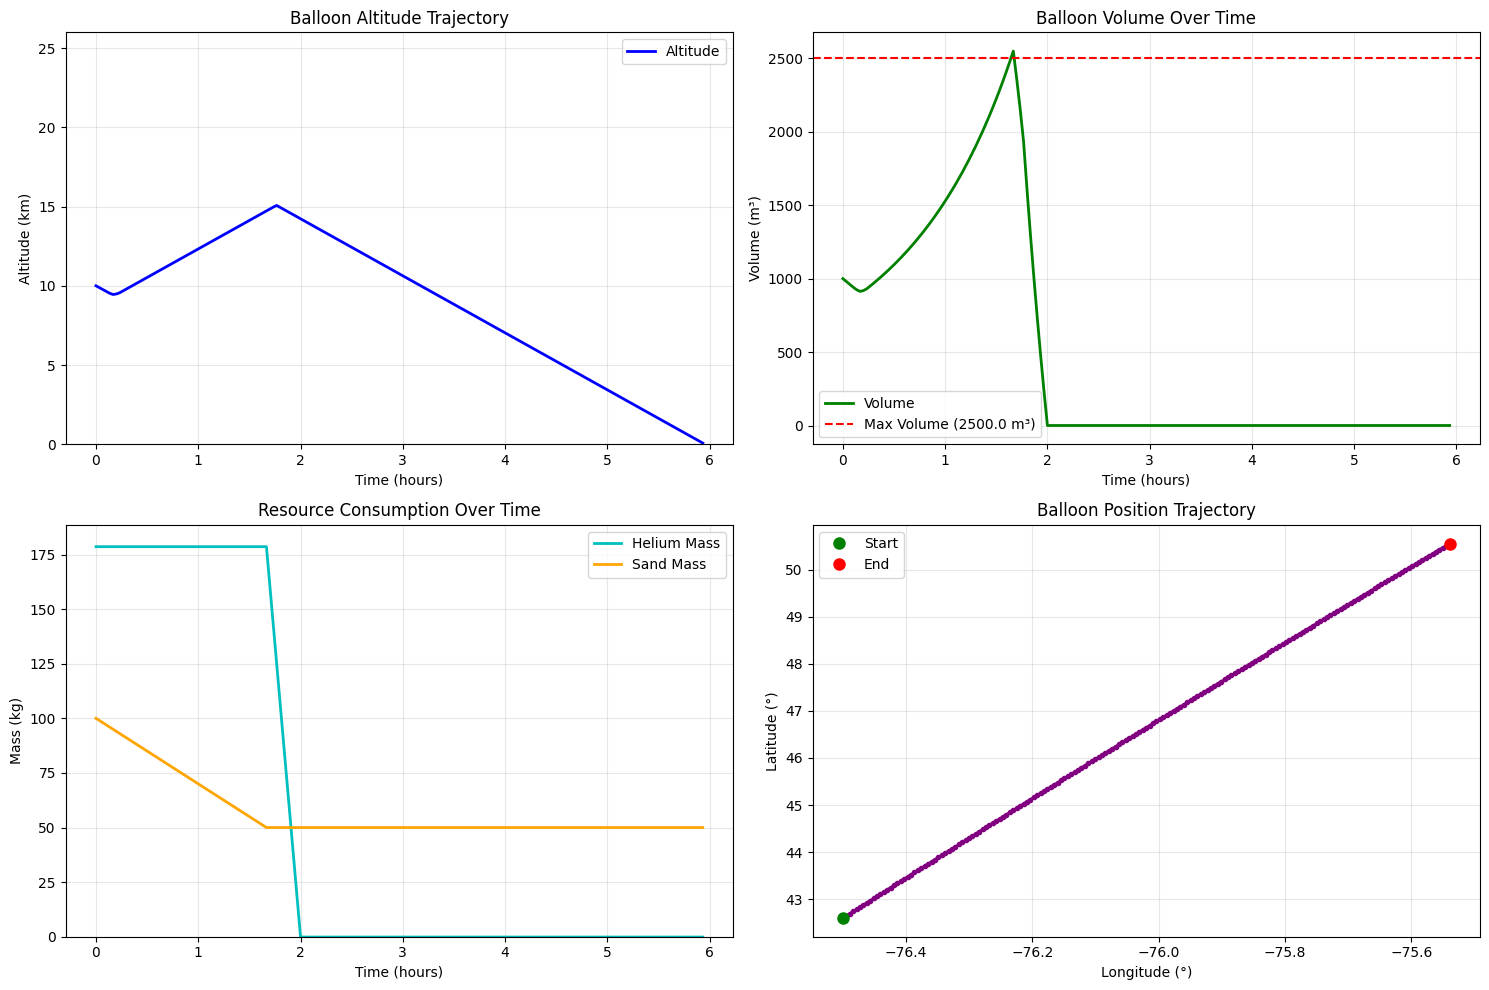

In [6]:
from plot_figure import BalloonSummaryPlotter

plotter = BalloonSummaryPlotter(
    altitudes, volumes, helium_masses, sand_masses,
    longitudes, latitudes, dt, balloon
)
plotter.plot()

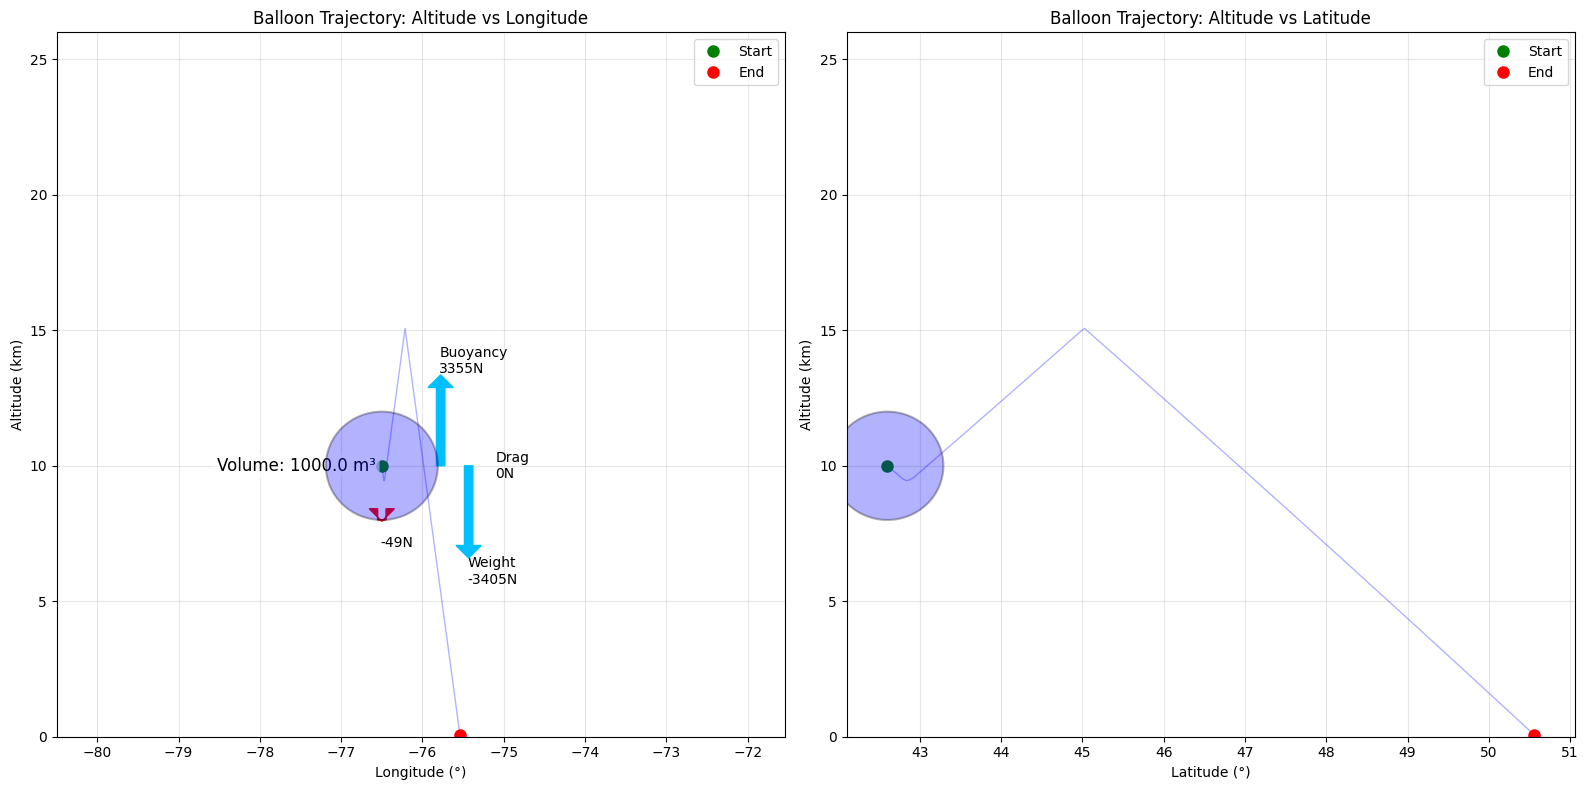

In [7]:
from plot_figure import BalloonTrajectoryAnimator
animator = BalloonTrajectoryAnimator(longitudes, latitudes, altitudes, volumes, forces)
animator.animate()
animator.save('trajectory_resource_control.gif', fps=2)

In [8]:
"""
It's hard to control the balloon's altitude with resource consumption.
Let's control the balloon's vertical velocity instead.
Design vertical velocity profile. 
- velocity is in m/s
"""
# # Constant velocity profile
# def velocity_profile(step):
#     return 1
# # Linearly increasing velocity profile
# def velocity_profile(step):
#     return step * 0.1
# Sinusoidal velocity profile
def velocity_profile(step):
    return np.sin(step*3/num_steps * 2 * np.pi) * 0.5


In [9]:
balloon.reset(
    initial_lat=initial_lat,
    initial_lon=initial_lon,
    initial_alt=initial_alt,
    initial_volume=initial_volume,
    initial_sand=initial_sand
)

In [10]:
times = np.arange(0, num_steps * dt, dt)
altitudes = []
latitudes = []
longitudes = []
volumes = []
helium_masses = []
sand_masses = []
forces = []
print(f"Running simulation for {num_steps} steps with dt={dt}s...")
print(f"Total simulation time: {num_steps * dt} seconds ({num_steps * dt / 3600:.2f} hours)")

# Store initial state
altitudes.append(balloon.alt)
latitudes.append(balloon.lat)
longitudes.append(balloon.lon)
volumes.append(balloon.volume)
helium_masses.append(balloon.helium_mass)
sand_masses.append(balloon.sand)
forces.append(balloon.forces)
burst_flag = False
depletion_flag = False
# Run simulation
for step in range(num_steps):
    # Control the balloon's altitude with velocity
    if burst_flag == False and depletion_flag == False:
        result = balloon.step_with_velocity(wind, dt, target_velocity=velocity_profile(step))
    # Unable to control balloon due to emergency
    else:
        result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    # result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    
    # Check if simulation ended due to resource depletion
    if result is not None:  # Resource depletion message
        if result == f"Balloon Crashed":
            print(f"\nSimulation stopped at step {step + 1}: {result}")
            break
        elif result == f"Balloon burst : {balloon.volume}":
            if burst_flag == False:
                print(f"\nAt step {step + 1}: {result}")
                burst_flag = True
                dHelium = initial_helium * 0.1 # start descend untrollably
                dSand = 0.0
        else:
            if depletion_flag == False:
                print(f"\nAt step {step + 1}: {result}")
                dHelium = 0.0
                dSand = 0.0
                depletion_flag = True
        
    altitudes.append(balloon.alt)
    latitudes.append(balloon.lat)
    longitudes.append(balloon.lon)
    volumes.append(balloon.volume)
    helium_masses.append(balloon.helium_mass)
    sand_masses.append(balloon.sand)
    forces.append(balloon.forces)
    
    # Progress indicator
    if (step + 1) % 20 == 0:
        print(f"Completed step {step + 1}/{num_steps}")

print("\nSimulation completed!")
print(f"Final altitude: {balloon.alt:.3f} km")
print(f"Final position: ({balloon.lat:.6f}°, {balloon.lon:.6f}°)")
print(f"Final volume: {balloon.volume:.2f} m³")
print(f"Remaining helium: {balloon.helium_mass:.2f} kg")
print(f"Remaining sand: {balloon.sand:.2f} kg")

Running simulation for 200 steps with dt=120s...
Total simulation time: 24000 seconds (6.67 hours)
Completed step 20/200
Completed step 40/200
Completed step 60/200
Completed step 80/200
Completed step 100/200
Completed step 120/200
Completed step 140/200
Completed step 160/200
Completed step 180/200
Completed step 200/200

Simulation completed!
Final altitude: 9.888 km
Final position: (51.503135°, -75.420814°)
Final volume: 938.34 m³
Remaining helium: 170.73 kg
Remaining sand: 87.87 kg


In [11]:
plotter = BalloonSummaryPlotter(
    altitudes, volumes, helium_masses, sand_masses,
    longitudes, latitudes, dt, balloon
)

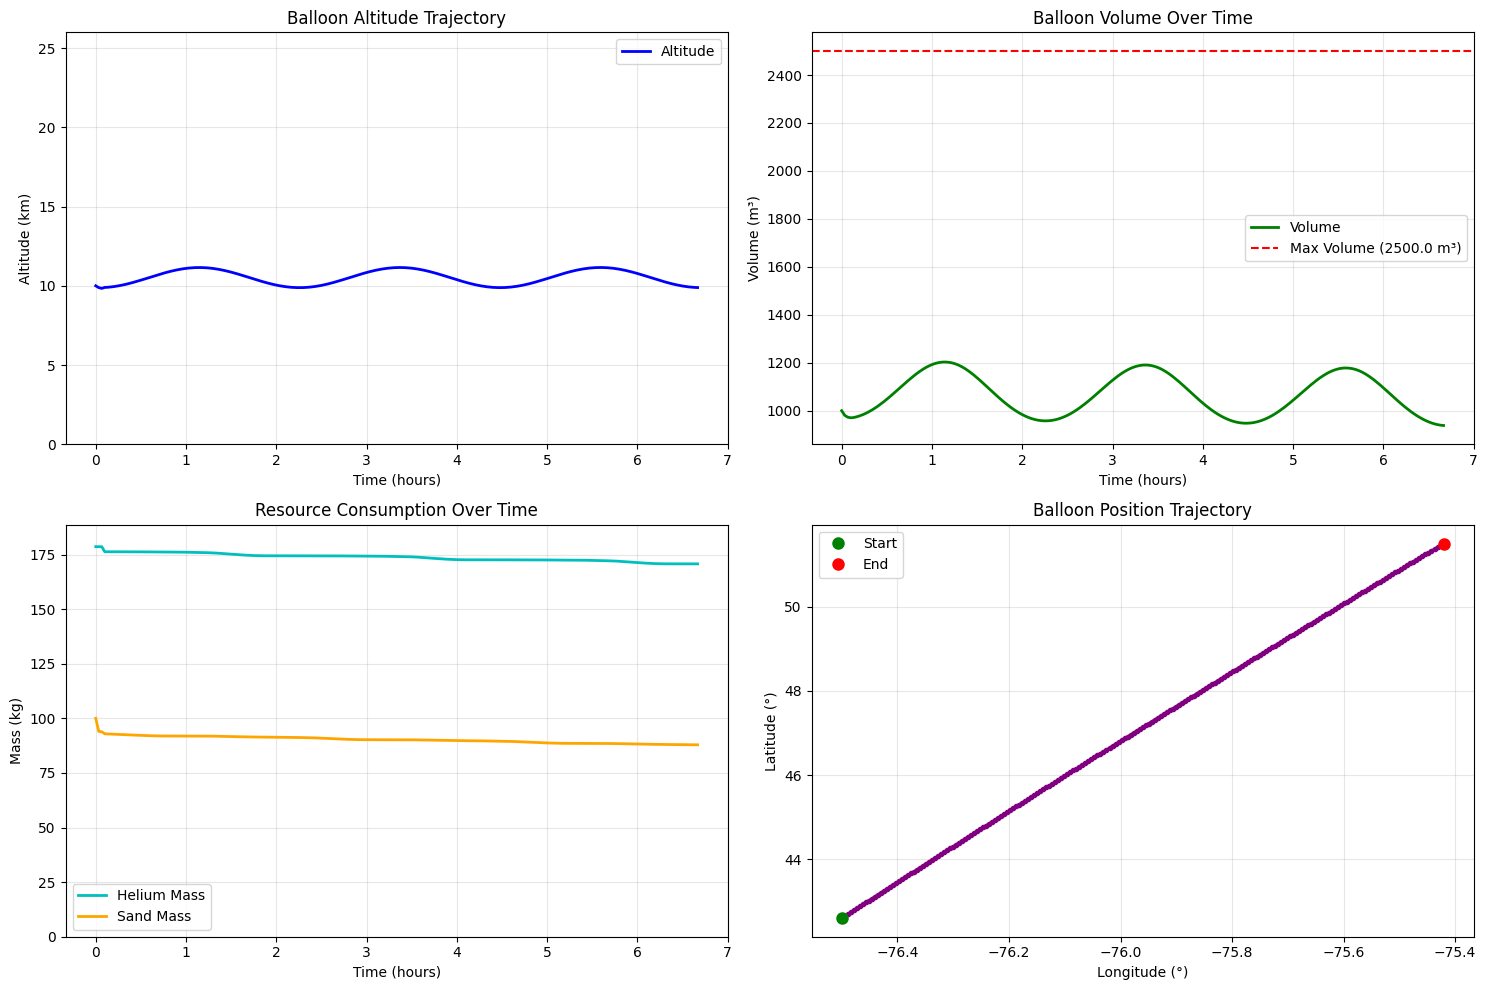

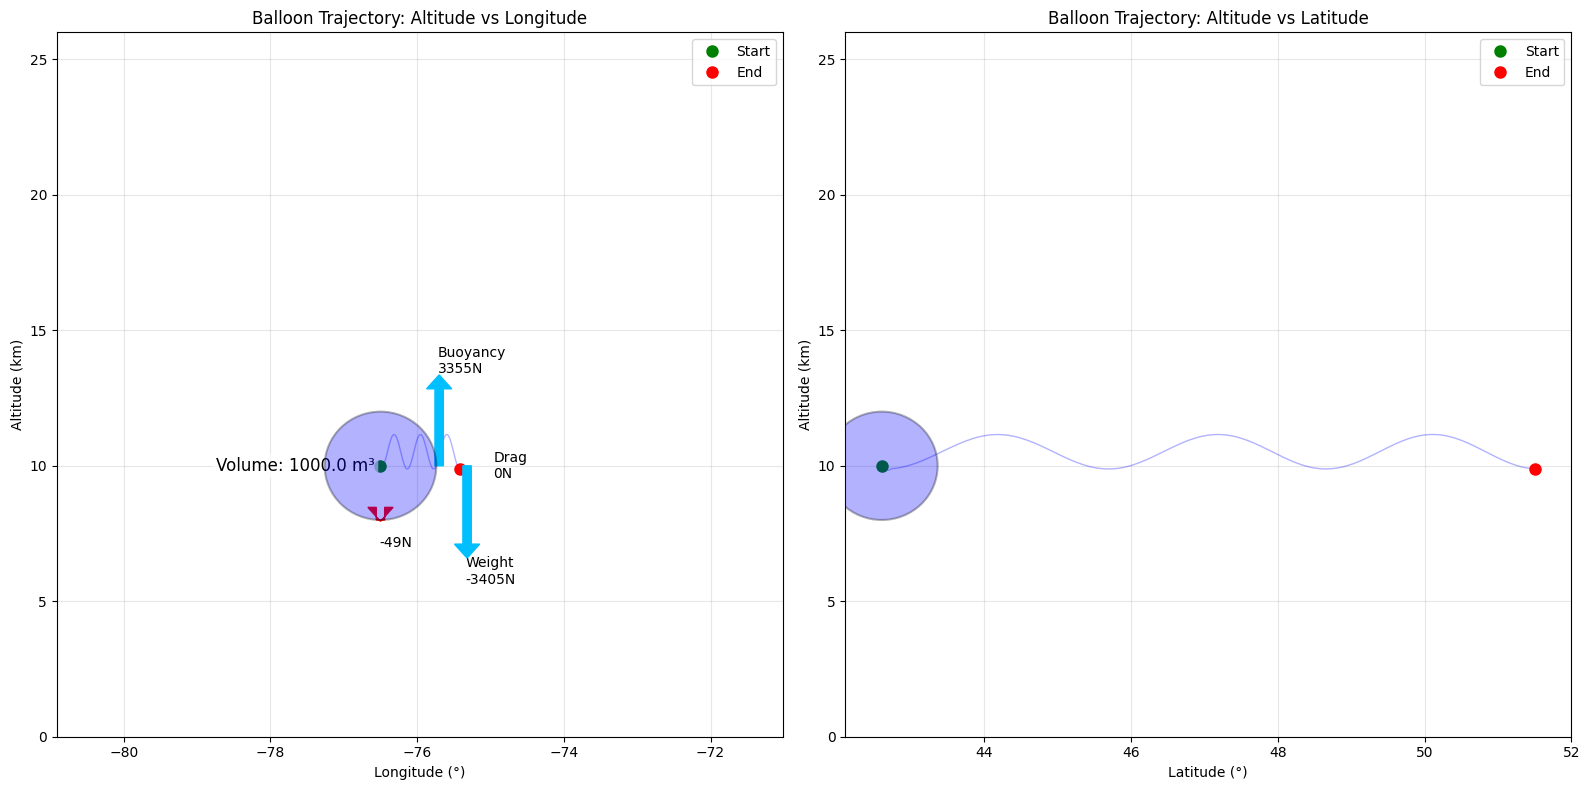

In [12]:
plotter.plot()
animator = BalloonTrajectoryAnimator(longitudes, latitudes, altitudes, volumes, forces)
animator.animate()
animator.save('trajectory_velocity_control.gif', fps=2)

In [13]:
"""
Let's control the balloon's altitude more directly.
Design altitude profile.
- altitude is in km
"""

# # Constant altitude profile
# def altitude_profile(step):
#     return 12
# # Linearly increasing altitude profile
# def altitude_profile(step):
#     return balloon.initial_alt + step * 0.1
# Sinusoidal altitude profile
def altitude_profile(step):
    return initial_alt + 2 * np.sin(step*3/num_steps * 2 * np.pi)


In [14]:
balloon.reset(
    initial_lat=initial_lat,
    initial_lon=initial_lon,
    initial_alt=initial_alt,
    initial_volume=initial_volume,
    initial_sand=initial_sand
)

In [15]:
times = np.arange(0, num_steps * dt, dt)
altitudes = []
latitudes = []
longitudes = []
volumes = []
helium_masses = []
sand_masses = []
forces = []
print(f"Running simulation for {num_steps} steps with dt={dt}s...")
print(f"Total simulation time: {num_steps * dt} seconds ({num_steps * dt / 3600:.2f} hours)")

# Store initial state
altitudes.append(balloon.alt)
latitudes.append(balloon.lat)
longitudes.append(balloon.lon)
volumes.append(balloon.volume)
helium_masses.append(balloon.helium_mass)
sand_masses.append(balloon.sand)
forces.append(balloon.forces)
burst_flag = False
depletion_flag = False
# Run simulation
for step in range(num_steps):
    # Control the balloon's altitude with velocity
    if burst_flag == False and depletion_flag == False:
        result = balloon.step_with_altitude(wind, dt, target_altitude=altitude_profile(step))
    # Unable to control balloon due to emergency
    else:
        result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    # result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    
    # Check if simulation ended due to resource depletion
    if result is not None:  # Resource depletion message
        if result == f"Balloon Crashed":
            print(f"\nSimulation stopped at step {step + 1}: {result}")
            break
        elif result == f"Balloon burst : {balloon.volume}":
            if burst_flag == False:
                print(f"\nAt step {step + 1}: {result}")
                burst_flag = True
                dHelium = initial_helium * 0.1 # start descend untrollably
                dSand = 0.0
        else:
            if depletion_flag == False:
                print(f"\nAt step {step + 1}: {result}")
                dHelium = 0.0
                dSand = 0.0
                depletion_flag = True
        
    altitudes.append(balloon.alt)
    latitudes.append(balloon.lat)
    longitudes.append(balloon.lon)
    volumes.append(balloon.volume)
    helium_masses.append(balloon.helium_mass)
    sand_masses.append(balloon.sand)
    forces.append(balloon.forces)
    
    # Progress indicator
    if (step + 1) % 20 == 0:
        print(f"Completed step {step + 1}/{num_steps}")

print("\nSimulation completed!")
print(f"Final altitude: {balloon.alt:.3f} km")
print(f"Final position: ({balloon.lat:.6f}°, {balloon.lon:.6f}°)")
print(f"Final volume: {balloon.volume:.2f} m³")
print(f"Remaining helium: {balloon.helium_mass:.2f} kg")
print(f"Remaining sand: {balloon.sand:.2f} kg")

Running simulation for 200 steps with dt=120s...
Total simulation time: 24000 seconds (6.67 hours)
Completed step 20/200
Completed step 40/200
Completed step 60/200
Completed step 80/200
Completed step 100/200
Completed step 120/200
Completed step 140/200
Completed step 160/200
Completed step 180/200
Completed step 200/200

Simulation completed!
Final altitude: 9.340 km
Final position: (51.503135°, -75.420814°)
Final volume: 855.46 m³
Remaining helium: 170.19 kg
Remaining sand: 87.53 kg


In [16]:
plotter = BalloonSummaryPlotter(
    altitudes, volumes, helium_masses, sand_masses,
    longitudes, latitudes, dt, balloon
)

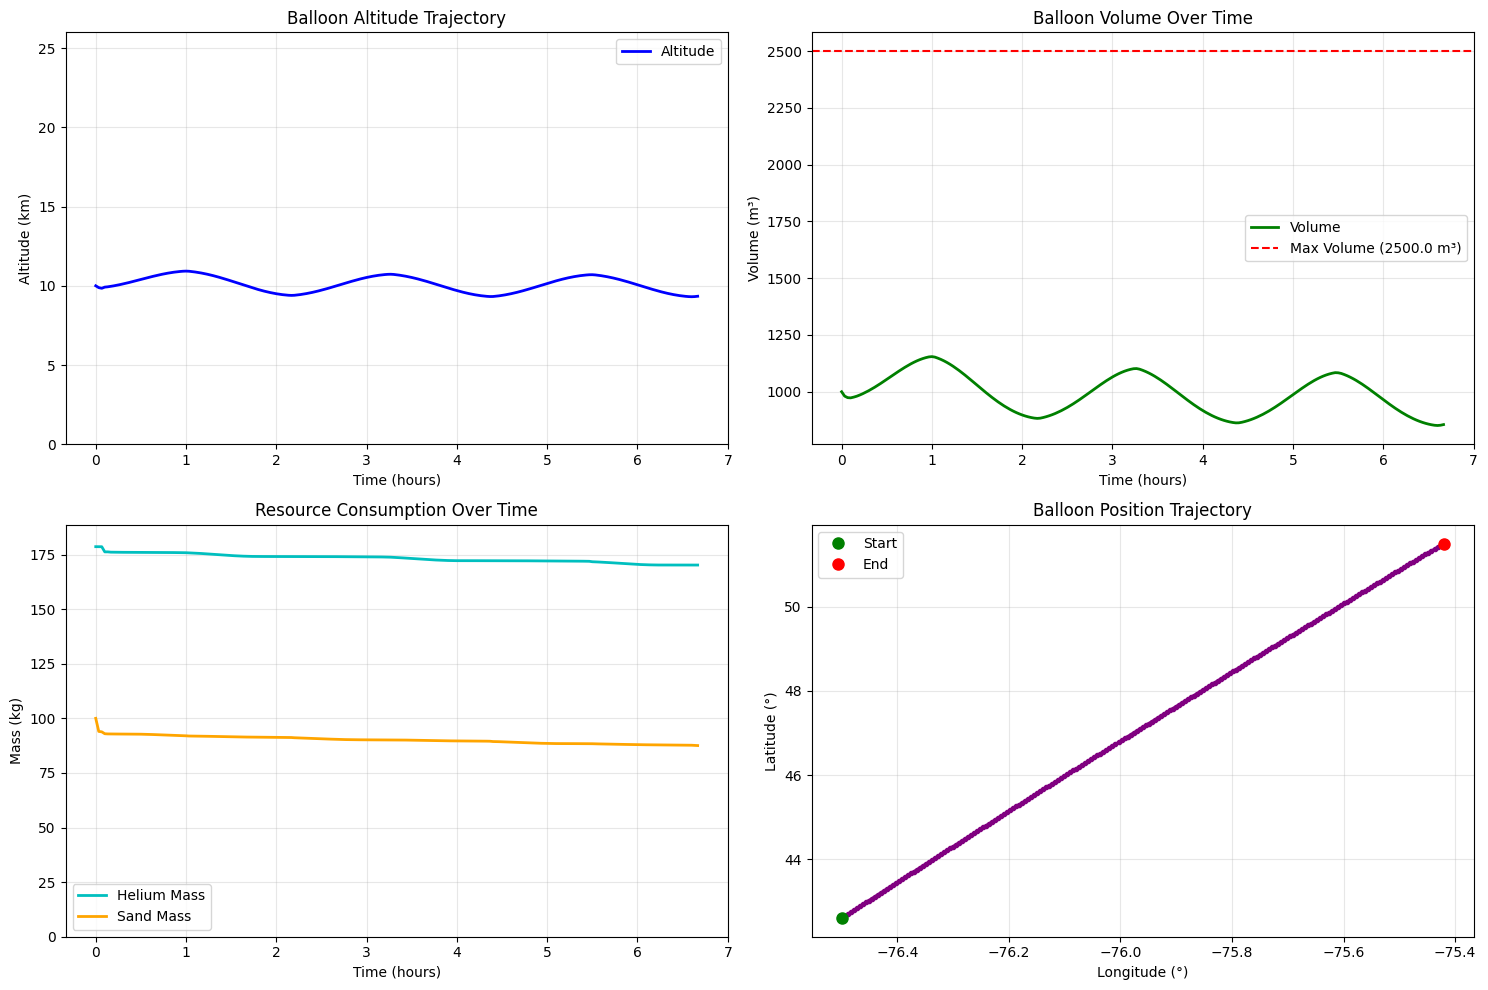

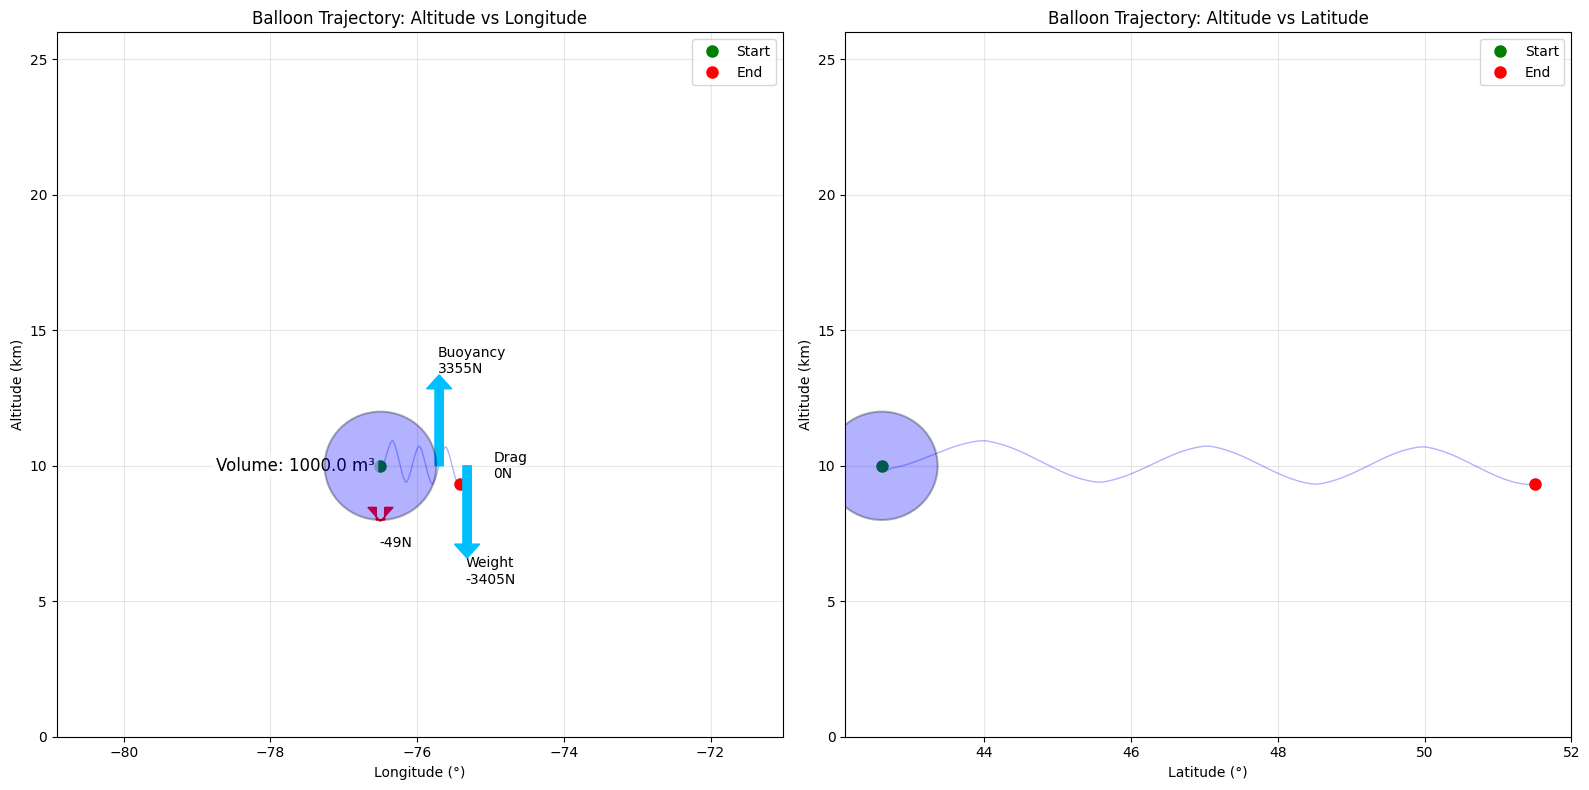

In [17]:
plotter.plot()
animator = BalloonTrajectoryAnimator(longitudes, latitudes, altitudes, volumes, forces)
animator.animate()
animator.save('trajectory_altitude_control.gif', fps=2)
